<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/12_Activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/jay-kanakia/Deep-Learning-CampusX/refs/heads/main/Datasets/Social_Network_Ads.csv')

In [3]:
df.sample(1)

,User ID,Gender,Age,EstimatedSalary,Purchased
334,15814553,Male,57,60000,1


In [4]:
# from sklearn.preprocessing import OneHotEncoder
# ohe=OneHotEncoder(drop='first',sparse_output=False)
# df['Gender']=pd.DataFrame(ohe.fit_transform(df[['Gender']]))

In [5]:
df.drop(columns=['User ID','Gender'],inplace=True)

In [6]:
df.sample(1)

,Age,EstimatedSalary,Purchased
155,31,15000,0


In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
y.shape

(400,)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [11]:
model=Sequential()
model.add(Dense(128,activation='linear',input_dim=X_train.shape[1]))
model.add(Dense(128,activation='linear'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(X_train_scaled,y_train,epochs=300,validation_split=0.2)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.6572 - loss: 0.6266 - val_accuracy: 0.8438 - val_loss: 0.4536
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7921 - loss: 0.4098 - val_accuracy: 0.8750 - val_loss: 0.4061
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8224 - loss: 0.4101 - val_accuracy: 0.8594 - val_loss: 0.3948
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8319 - loss: 0.3787 - val_accuracy: 0.8594 - val_loss: 0.3842
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8239 - loss: 0.3654 - val_accuracy: 0.8594 - val_loss: 0.3801
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8498 - loss: 0.3416 - val_accuracy: 0.8594 - val_loss: 0.3836
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8426 - loss: 0.3449 - val_accuracy: 0.8438 - val_loss: 0.3864
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8276 - loss: 0.3659 - val_accuracy: 0.8438 - val_loss

[]

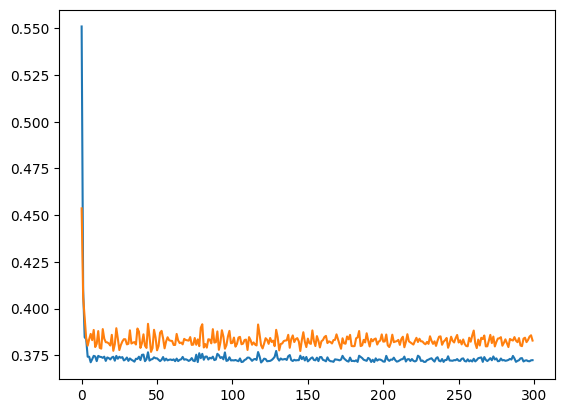

In [15]:
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])
plt.plot()

[]

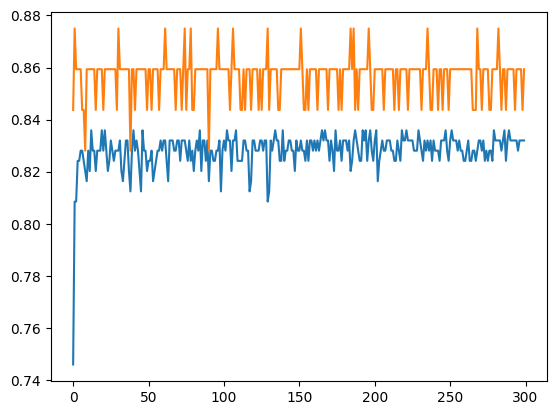

In [16]:
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['val_accuracy'])
plt.plot()

In [17]:
model.evaluate(X_train_scaled,y_train)[1]*100

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8402 - loss: 0.3606 


83.74999761581421

In [18]:
model.evaluate(X_test_scaled,y_test)[1]*100

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8609 - loss: 0.2536 


86.2500011920929

In [19]:
y_pred=model.predict(X_test_scaled).argmax(axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [31]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

65.0

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

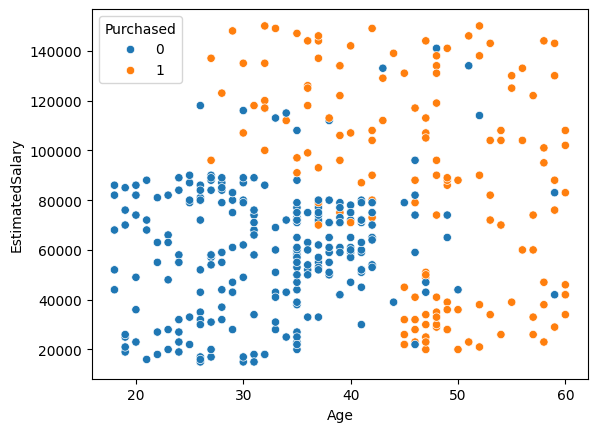

In [30]:
sns.scatterplot(x=X['Age'],y=X['EstimatedSalary'],hue=y)
sns.lineplot(x=X_test_scaled['Age'], y=y_pred)
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step


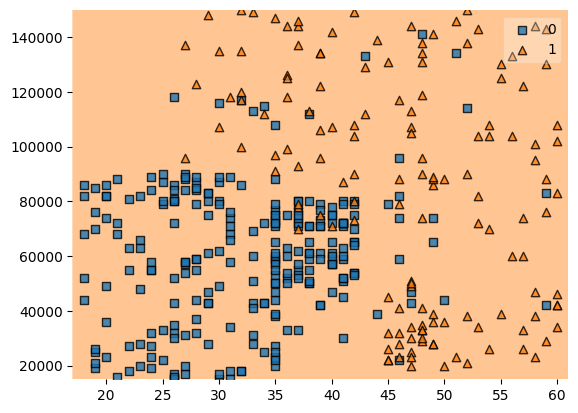

In [38]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.to_numpy(),y.to_numpy(),clf=model)
plt.show()

In [39]:
model1=Sequential()
model1.add(Dense(128,activation='relu',input_dim=X.shape[1]))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history1=model1.fit(X_train_scaled,y_train,validation_split=0.2,epochs=300)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.6886 - loss: 0.6636 - val_accuracy: 0.8594 - val_loss: 0.5759
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8242 - loss: 0.5390 - val_accuracy: 0.8438 - val_loss: 0.4958
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8376 - loss: 0.4602 - val_accuracy: 0.8750 - val_loss: 0.4334
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8580 - loss: 0.3850 - val_accuracy: 0.8750 - val_loss: 0.3929
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8460 - loss: 0.3483 - val_accuracy: 0.8594 - val_loss: 0.3638
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8555 - loss: 0.3215 - val_accuracy: 0.8750 - val_loss: 0.3375
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8897 - loss: 0.3103 - val_accuracy: 0.8750 - val_loss: 0.3195
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9006 - loss: 0.2789 - val_accuracy: 0.8750 - val_loss:

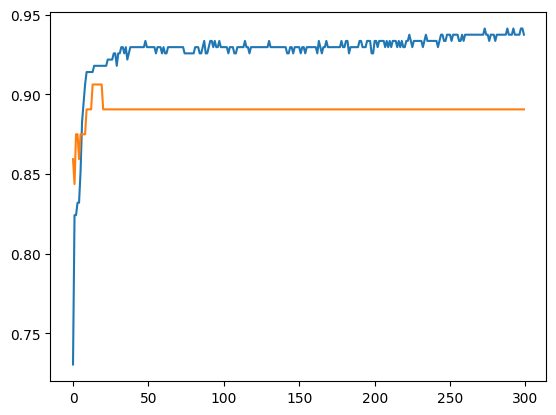

In [40]:
sns.lineplot(history1.history['accuracy'])
sns.lineplot(history1.history['val_accuracy'])
plt.show()

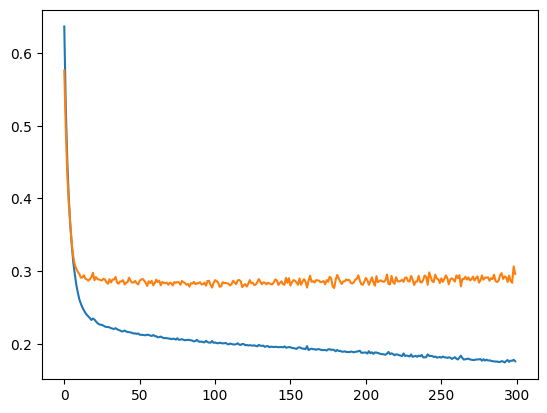

In [41]:
sns.lineplot(history1.history['loss'])
sns.lineplot(history1.history['val_loss'])
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step


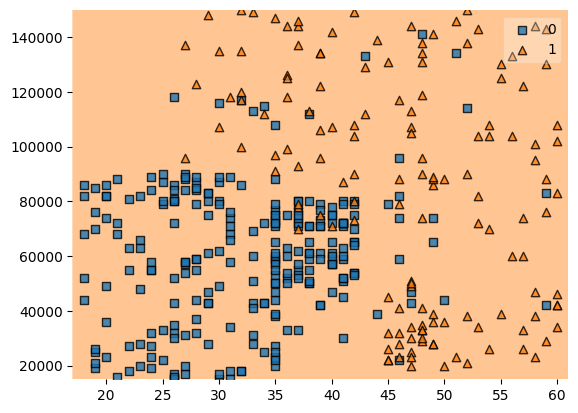

In [44]:
plot_decision_regions(X.to_numpy(),y.to_numpy(),clf=model1)
plt.show()